<a href="https://colab.research.google.com/github/vn322/Synergy_DBM_301_CS/blob/main/01_pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center>
<img src="https://camo.githubusercontent.com/1faf678af2925dc98a2fb877b80461f1c992b9e7e229412e5d6b729c49246ffa/68747470733a2f2f7079746f7263682e6f72672f7475746f7269616c732f5f7374617469632f7079746f7263682d6c6f676f2d6461726b2e737667" height="400" width="800"> 

# Семинар 1: введение в PyTorch
</center>

Если кому-то интересно,  можно подробнее почитать про [раличия между Tensorflow и Pytorch.](https://towardsdatascience.com/pytorch-vs-tensorflow-spotting-the-difference-25c75777377b)



Устанавливаем библиотеку

```
pip install torch torchvision
```

Дополнительно с торчом выходят `torchvision` и `torchaudio`. В них куча всяких методов дял работы с изображениями и звуком. Обе эти библиотеки тоже можно поставить виесте с торчом. Первая из них уже сегодня нам понадобится. 

In [ ]:
import numpy as np
np.__version__

'1.22.4'

In [ ]:
import torch
torch.__version__ 

'2.0.0+cu118'

# 1. Тензоры и базовые операции над ними

Основной объект в PyTorch - это **тензор.** Или многомерный массив чисел. Чтобы не нужно было учить кучу новых команд, PyTorch косплеит numpy. 

```
    np.zeros -> torch.zeros
    np.sin -> torch.sin
    np.cumsum -> torch.cumsum
    
    x.reshape([1,2,8]) -> x.view(1,2,8)
    x.sum(axis=-1) -> x.sum(dim=-1)
    x.astype('int64') -> x.type(torch.LongTensor)
```

Правда говоря, не совсем косплеит. Но чаще всего оказывается довольно близок. Для помощи вам есть [таблица](https://github.com/torch/torch7/wiki/Torch-for-Numpy-users), которая поможет вам найти аналог операции в numpy.

In [ ]:
# как в нумпае можно объявить вектор
x = torch.tensor([1, 2, 3, 4])
x

tensor([1, 2, 3, 4])

In [ ]:
# можно задать тензор из нулей
torch.zeros([3, 4])

tensor([[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]])

In [ ]:
# или из единиц, но уже более сложной размерности
torch.ones([3, 4, 2])

tensor([[[1., 1.],
         [1., 1.],
         [1., 1.],
         [1., 1.]],

        [[1., 1.],
         [1., 1.],
         [1., 1.],
         [1., 1.]],

        [[1., 1.],
         [1., 1.],
         [1., 1.],
         [1., 1.]]])

In [ ]:
# можно сгенерировать тензор из стандартного нормального распределения
torch.randn([2,2])

tensor([[-0.6616,  0.0057],
        [-0.3199,  0.3626]])

In [ ]:
x = torch.empty(5, 3) # пустой тензор
x

tensor([[ 8.4059e-35,  0.0000e+00,  9.6575e-36],
        [ 0.0000e+00, -2.4189e+02,  4.5765e-41],
        [ 0.0000e+00,  0.0000e+00,  0.0000e+00],
        [ 0.0000e+00,  0.0000e+00,  0.0000e+00],
        [ 0.0000e+00,  0.0000e+00,  0.0000e+00]])

In [ ]:
# тензор с нулями и указанием типов чисел
x = torch.zeros(5, 3, dtype=torch.double) 
print(x)

tensor([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]], dtype=torch.float64)


In [ ]:
 # используем уже созданный тензор для создания тензора из единичек
x = x.new_ones(5, 3, dtype=torch.double)
print(x) 

tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]], dtype=torch.float64)


In [ ]:
# создаем матрицу с размерами как у x
x = torch.randn_like(x, dtype=torch.float)
print(x)

tensor([[-0.3248,  1.0169,  0.8309],
        [-0.6893, -0.0356,  1.8037],
        [ 1.1152,  1.2825, -0.3707],
        [-1.6880,  0.5909,  0.6446],
        [ 0.5001,  0.6603,  1.6465]])


In [ ]:
x.double() # можно поменяить тип данных

tensor([[-0.3248,  1.0169,  0.8309],
        [-0.6893, -0.0356,  1.8037],
        [ 1.1152,  1.2825, -0.3707],
        [-1.6880,  0.5909,  0.6446],
        [ 0.5001,  0.6603,  1.6465]], dtype=torch.float64)

In [ ]:
x.int()

tensor([[ 0,  1,  0],
        [ 0,  0,  1],
        [ 1,  1,  0],
        [-1,  0,  0],
        [ 0,  0,  1]], dtype=torch.int32)

In [ ]:
# как думаете, почему не пишет dtype? 
x.float()

tensor([[-0.3248,  1.0169,  0.8309],
        [-0.6893, -0.0356,  1.8037],
        [ 1.1152,  1.2825, -0.3707],
        [-1.6880,  0.5909,  0.6446],
        [ 0.5001,  0.6603,  1.6465]])

Все срезы, операции, размерности работают как в numpy.

In [ ]:
x.size()

torch.Size([5, 3])

In [ ]:
x.dtype

torch.float32

In [ ]:
x.shape

torch.Size([5, 3])

In [ ]:
x[0]

tensor([-0.3248,  1.0169,  0.8309])

In [ ]:
x[:,1]

tensor([ 1.0169, -0.0356,  1.2825,  0.5909,  0.6603])

In [ ]:
x + 10

tensor([[ 9.6752, 11.0169, 10.8309],
        [ 9.3108,  9.9644, 11.8037],
        [11.1152, 11.2825,  9.6293],
        [ 8.3120, 10.5909, 10.6446],
        [10.5001, 10.6603, 11.6465]])

In [ ]:
torch.exp(x)

tensor([[0.7227, 2.7647, 2.2953],
        [0.5020, 0.9651, 6.0721],
        [3.0502, 3.6058, 0.6903],
        [0.1849, 1.8057, 1.9052],
        [1.6489, 1.9353, 5.1886]])

In [ ]:
x[x > 0]

tensor([1.0169, 0.8309, 1.8037, 1.1152, 1.2825, 0.5909, 0.6446, 0.5001, 0.6603,
        1.6465])

In [ ]:
y = torch.rand(5, 3)
y

tensor([[0.0389, 0.4549, 0.8718],
        [0.2286, 0.1297, 0.5867],
        [0.8427, 0.0651, 0.1727],
        [0.5814, 0.2242, 0.9706],
        [0.7439, 0.9451, 0.2814]])

In [ ]:
print(x + y) # операция сложение

tensor([[-0.2859,  1.4718,  1.7027],
        [-0.4606,  0.0941,  2.3904],
        [ 1.9579,  1.3476, -0.1979],
        [-1.1066,  0.8151,  1.6151],
        [ 1.2439,  1.6054,  1.9279]])


In [ ]:
z = torch.add(x, y) # очередная операция сложения
print(z)

tensor([[-0.2859,  1.4718,  1.7027],
        [-0.4606,  0.0941,  2.3904],
        [ 1.9579,  1.3476, -0.1979],
        [-1.1066,  0.8151,  1.6151],
        [ 1.2439,  1.6054,  1.9279]])


In [ ]:
torch.add(x, y, out=z) # и наконец последний вид
print(z)

tensor([[-0.2859,  1.4718,  1.7027],
        [-0.4606,  0.0941,  2.3904],
        [ 1.9579,  1.3476, -0.1979],
        [-1.1066,  0.8151,  1.6151],
        [ 1.2439,  1.6054,  1.9279]])


In [ ]:
print(x * y) # поэлементное умножение

tensor([[-0.0126,  0.4625,  0.7244],
        [-0.1576, -0.0046,  1.0582],
        [ 0.9397,  0.0835, -0.0640],
        [-0.9814,  0.1325,  0.6256],
        [ 0.3720,  0.6240,  0.4634]])


In [ ]:
print(x @ y.t()) # матричное умножение

tensor([[ 1.1743,  0.5451, -0.0640,  0.8456,  0.9534],
        [ 1.5295,  0.8960, -0.2716,  1.3419, -0.0387],
        [ 0.3036,  0.2038,  0.9592,  0.5762,  1.9374],
        [ 0.7650,  0.0689, -1.2726, -0.2233, -0.5157],
        [ 1.7552,  1.1659,  0.7488,  2.0368,  1.4594]])


In [ ]:
# и опять матричное умножение
print(x.mm(y.t()))

tensor([[ 1.1743,  0.5451, -0.0640,  0.8456,  0.9534],
        [ 1.5295,  0.8960, -0.2716,  1.3419, -0.0387],
        [ 0.3036,  0.2038,  0.9592,  0.5762,  1.9374],
        [ 0.7650,  0.0689, -1.2726, -0.2233, -0.5157],
        [ 1.7552,  1.1659,  0.7488,  2.0368,  1.4594]])


In [ ]:
# добавили измерение в начало, аналог броадкастинга 
print(x.unsqueeze(0).shape)

torch.Size([1, 5, 3])


In [ ]:
x.unsqueeze(0)

tensor([[[-0.3248,  1.0169,  0.8309],
         [-0.6893, -0.0356,  1.8037],
         [ 1.1152,  1.2825, -0.3707],
         [-1.6880,  0.5909,  0.6446],
         [ 0.5001,  0.6603,  1.6465]]])

In [ ]:
# убрали измерение в начале, аналог броадкастинга 
print(x.unsqueeze(0).squeeze(0).shape)

torch.Size([5, 3])


In [ ]:
x.unsqueeze(0).squeeze(0)

tensor([[-0.3248,  1.0169,  0.8309],
        [-0.6893, -0.0356,  1.8037],
        [ 1.1152,  1.2825, -0.3707],
        [-1.6880,  0.5909,  0.6446],
        [ 0.5001,  0.6603,  1.6465]])

Мы также можем переводить матрицы назад в numpy:

In [ ]:
x.numpy()

array([[-0.32478788,  1.0169196 ,  0.8308774 ],
       [-0.68925005, -0.03556003,  1.8037102 ],
       [ 1.115194  ,  1.2825487 , -0.3706749 ],
       [-1.688005  ,  0.59092957,  0.6445874 ],
       [ 0.50009596,  0.66025287,  1.6464661 ]], dtype=float32)

### Задание 1: 

- При помощи numpy посчитайте сумму квадратов чисел от 1 до 10000
- Сделайте то же самое с помощью pytorch

In [ ]:
np.square(np.arange(1, 10_000+1)).sum()

333383335000

In [ ]:
# .item() возвращает число из тензора. 
# Без этого будет тензор размерности 1x1

torch.square(torch.arange(1, 10_000+1)).sum().item()

333383335000

### Задание 2:

Реализуйте на PyTorch сигмоиду 

$$ \sigma(x) = \frac{1}{1 + e^{-x}} $$

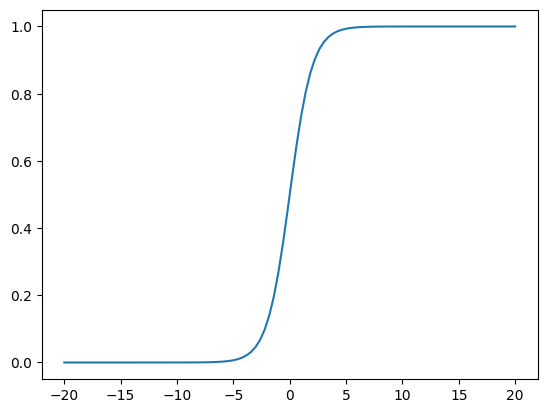

In [ ]:
import matplotlib.pyplot as plt

x = torch.linspace(-20, 20, 100)

def sigm(x):
    return 1/(1 + torch.exp(-x))

y = sigm(x)

plt.plot(x, y);

### Задание 3:

Реализуйте на PyTorch среднюю квадратичную ошибку. 

$$ 
MSE(\hat y, y) = \frac{1}{n} \cdot \sum_{i=1}^n (\hat y - y)^2
$$

In [ ]:
y_pred = torch.tensor([1, 2, 3, 4, 5], dtype=torch.float)
y_test = torch.tensor([-1, 3, 4, 6, -5], dtype=torch.float)

In [ ]:
def mse(y_true, y_predict):
    return torch.mean((y_true - y_pred)**2)

z = mse(y_test, y_pred)
z.item()

22.0

### Задание 4:

Что будет в переменной `x` в результате выполнения следующего кода? Почему?

In [ ]:
import torch
x = torch.tensor([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
y = x
y[2] = torch.ones(3)

In [ ]:
y

tensor([[1, 2, 3],
        [4, 5, 6],
        [1, 1, 1]])

In [ ]:
x

tensor([[1, 2, 3],
        [4, 5, 6],
        [1, 1, 1]])

In [ ]:
x = torch.tensor([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
y = x.clone()
y[2] = torch.ones(3)

x

tensor([[1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]])

------------------------------------------

# 2. Производные да градиенты

Если в PyTorch те же самые операции, что и в numpy, то на кой чёрт он нам нужен? В отличие от numpy, в PyTorch есть возможность при создании тензора указывать нужно ли считать по нему градиент или нет, с помощью параметра `requires_grad`. 

Когда `requires_grad=True` мы сообщаем фреймворку, о том, что мы хотим следить за всеми тензорами, которые получаются из созданного. Иными словами, у любого тензора, у которого указан данный параметр, будет доступ к цепочке операций и преобразований совершенными с ними. Если эти функции дифференцируемые, то у тензора появляется параметр `.grad`, в котором хранится значение градиента.

Он проходит по всем операциям, которые фигурируют в графе вычислений, и применяет к ним chain rule:

$$ {\partial f(g(x)) \over \partial x} = {\partial f(g(x)) \over \partial g(x)}\cdot {\partial g(x) \over \partial x} $$

Давайте попробуем!

In [ ]:
x = torch.tensor(
    [0.3, 1], requires_grad=True
)

In [ ]:
y = torch.sum(x)
z = y ** 2 

Если к результирующему тензору применить метод `.backward()`, то фреймворк посчитает по цепочке градиенты для всех тензоров, у которых `requires_grad=True.`

In [ ]:
# пока градиента нет
print(x.grad, '<- gradient')

None <- gradient


In [ ]:
z.backward() # считаем градиент
print(x.grad, '<- gradient')

tensor([2.6000, 2.6000]) <- gradient


**Важно:** если вы вычисляете градиент дважды, градиенты будут суммироваться в тензорах, поэтому полезно обнулять градиенты между итерациями.

Обычно мы обучаем модель не по одному объекту, а на большой выборке. Вся выборка обычно в память не влезает. Мы прогоняем через нейросеть данные батчами. PyTorch позволяет накапливать градиенты по батчам не помещая в память все данные. Иногда это оказывается полезным.

In [ ]:
# можно посмотреть на порядок действий
print(z.grad_fn)
print(z.grad_fn.next_functions[0][0])
print(z.grad_fn.next_functions[0][0].next_functions[0][0])

### Задание 5:

Реализуйте расчёт градиента для функции 

$$
f(w) = \prod_{i,j} \ln(\ln(w_{ij} + 7) 
$$

в точке `w = [[5,10], [1,2]]`

In [ ]:
# ваш код
w =  torch.tensor([[5.,10.],[1.,2.]], requires_grad=True)

function =  torch.prod(torch.log(torch.log(w + 7)))
function.backward()

print(w.grad)

tensor([[0.0201, 0.0109],
        [0.0449, 0.0351]])


------------------------------------------

# 3. Оптимизация

Итак, PyTorch умеет искать производные, осталось научиться применять его для оптимизации. 

Давайте обучим линейную регрессию.

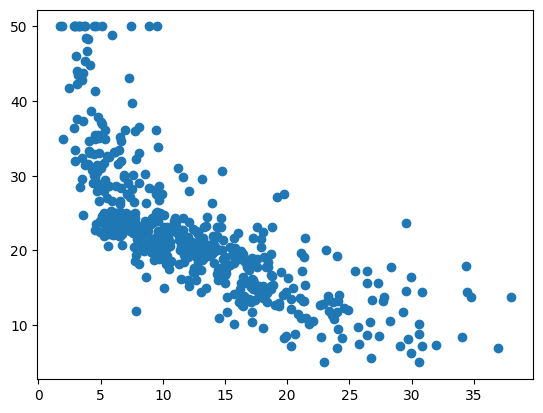

In [ ]:
import pandas as pd

data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]

plt.scatter(data[:, -1], target);

Нам надо обучить линейную регрессию. 

In [ ]:
w = torch.randn(1, requires_grad=True)
b = torch.randn(1, requires_grad=True)

In [ ]:
w, b

(tensor([-0.0249], requires_grad=True), tensor([0.1742], requires_grad=True))

In [ ]:
x = torch.tensor(data[:, -1] / data[:, -1].max(), dtype=torch.float32)
y = torch.tensor(target, dtype=torch.float32)

In [ ]:
# Наша модель
def linear_regression(x):
    return w*x + b

# Ошибка для модели
def mean_square(y_pred, y_true):
    return torch.mean((y_pred-y_true)**2)

In [ ]:
pred = linear_regression(x)
pred.shape

torch.Size([506])

In [ ]:
loss = mean_square(pred, y)
loss

tensor(584.6359, grad_fn=<MeanBackward0>)

In [ ]:
# считаем градиенты
loss.backward()

In [ ]:
print("dL/dw = \n", w.grad)
print("dL/db = \n", b.grad)

dL/dw = 
 tensor([-12.3620])
dL/db = 
 tensor([-44.7339])


Обучим нашу линейную регрессию.

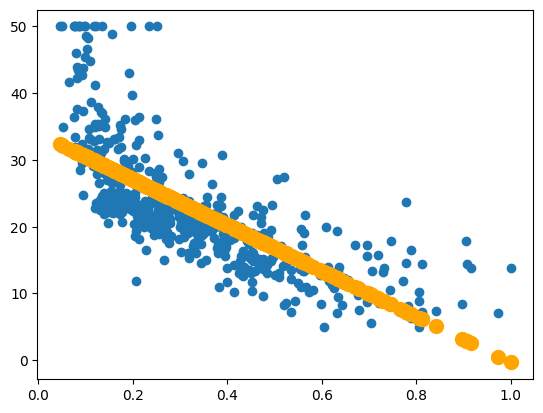

loss =  38.59655


In [ ]:
from IPython.display import clear_output

epochs = 1000 # число эпох 

w = torch.randn(1, requires_grad=True)
b = torch.randn(1, requires_grad=True)

for i in range(epochs):

    y_pred = w * x + b
    loss = torch.mean((y_pred - y)**2)
    loss.backward()

    # делаем шаг градиентного спуска с lr = .05
    w.data -= 0.05 * w.grad.data 
    b.data -= 0.05 * b.grad.data

    # обнуляем градиенты, чтобы на следующем шаге опять посчитать и не аккумулировать их
    w.grad.data.zero_()
    b.grad.data.zero_()

    # рисуем картинки
    if (i+1) % 5 == 0:
        clear_output(True)
        plt.scatter(x.data.numpy(), y.data.numpy())
        plt.scatter(x.data.numpy(), y_pred.data.numpy(),
                    color='orange', linewidth=5)
        plt.show()

        print("loss = ", loss.data.numpy())
        if loss.data.numpy() < 0.5:
            print("Done!")
            break


### Задание 6:

Реализуйте для функции 

$$
f(w) = \prod_{i,j} \ln(\ln(w_{ij} + 7) 
$$

процедуру градиентного спуска. Каким получилось минимальное значение? 

In [ ]:
w = torch.tensor([[5., 10.], [1., 2.]], requires_grad=True)
alpha = 0.001

for _ in range(500):
    # it's critical to calculate function inside the loop:
    function = (w + 7).log().log().prod()
    function.backward()
    w.data -= alpha * w.grad
    w.grad.zero_()

print(w)

tensor([[4.9900, 9.9948],
        [0.9775, 1.9825]], requires_grad=True)


# 4. Моя первая нейросеть 

Для того, чтобы разобраться как обучать нейросетки, нужно освоить три вещи: 

1. Как обрабатывать поток данных и пихать его в сетку
2. Как сделать сетку
3. Как написать цикл обучения

## 4.1 Как формировать батчи и пихать их в сетку

С данными помогают работать две абстракции: `Dataset` и `DataLoader`.

`Dataset` умеет выдавать по индексу некоторый элемент и помогает итерироваться по данным. Чтобы работать с данными и применять к ним преобразования, например, аугментации, о которых вы узнаете позже — нужно создать свой класс унаследованный от `torch.utils.data.Dataset`.

Вот пример из документации:

```
class FaceLandmarksDataset(torch.utils.data.Dataset):
    """Face Landmarks dataset."""

    def __init__(self, csv_file, root_dir, transform=None):
        """
        Args:
            csv_file (string): Path to the csv file with annotations.
            root_dir (string): Directory with all the images.
            transform (callable, optional): Optional transform to be applied
                on a sample.
        """
        self.landmarks_frame = pd.read_csv(csv_file)
        self.root_dir = root_dir
        self.transform = transform

    def __len__(self):
        return len(self.landmarks_frame)

    def __getitem__(self, idx):
        if torch.is_tensor(idx):
            idx = idx.tolist()

        img_name = os.path.join(self.root_dir,
                                self.landmarks_frame.iloc[idx, 0])
        image = io.imread(img_name)
        landmarks = self.landmarks_frame.iloc[idx, 1:]
        landmarks = np.array([landmarks])
        landmarks = landmarks.astype('float').reshape(-1, 2)
        sample = {'image': image, 'landmarks': landmarks}

        if self.transform:
            sample = self.transform(sample)

        return sample
```

Как вы видите, у такого класса должно быть два метода: 

* `__len__` — возвращает информацию о том, сколько объектов у нас в датасете
* `__getitem__` — возвращает семпл и таргет к нему

Теперь давайте напишем такой сами, в качестве датасета сгенерируем рандомные данные.

In [ ]:
class RandomDataset(torch.utils.data.Dataset):
    """Our random dataset"""
    
    def __init__(self, x, y):
        self.x=x
        self.y=y
        
    def __len__(self):
        return len(self.x)
    
    def __getitem__(self, idx):
        return {'sample': torch.tensor(x[idx, :], dtype=torch.float), 'target': y[idx]}

In [ ]:
x = np.random.rand(1000, 5)
y = np.random.rand(1000)

In [ ]:
our_dataset = RandomDataset(x, y)

In [ ]:
our_dataset.__getitem__(1)

{'sample': tensor([0.2818, 0.9121, 0.7825, 0.3733, 0.5294]),
 'target': 0.5043001422790946}

`Dataset` умеет говорить сколько в выборке объектов и брать из неё очередной. Этого мало. Данные хочется как-то видоизменять. Для этого есть такая сущность как `DataLoader`.

Он принимает на вход класс унаследованный от `torch.utils.data.Dataset` и преобразовывает его.

In [ ]:
dataloader = torch.utils.data.DataLoader(our_dataset, batch_size=4)

Работают с ним следующим образом:

In [ ]:
for batch in dataloader:
    batch_x = batch['sample']
    batch_y = batch['target']
    break
    
print('Sample:', batch_x)
print('Target:', batch_y)

Sample: tensor([[0.3722, 0.0114, 0.2744, 0.7695, 0.3046],
        [0.2818, 0.9121, 0.7825, 0.3733, 0.5294],
        [0.2418, 0.7356, 0.4305, 0.0160, 0.5177],
        [0.2764, 0.3557, 0.4687, 0.4140, 0.2503]])
Target: tensor([0.4432, 0.5043, 0.6372, 0.5250], dtype=torch.float64)


## 4.2 Нейронная сеть

Есть несколько способов собрать нейросетку.

__Способ 1:__ Для того, чтобы в high-level pytorch создавать нейросети используется модуль `nn`. Нейросеть должна быть унаследована от класса `nn.Module`. Пример как это может выглядеть:

In [ ]:
from torch import nn
import torch.nn.functional as F

class Model(nn.Module):
    def __init__(self):
        super(Model, self).__init__()
        self.layer1 = nn.Linear(5, 3)
        self.layer2 = nn.Linear(3, 1)

    def forward(self, x):
        x = F.relu(self.layer1(x))
        return F.relu(self.layer2(x))

Как мы видим на данном примере, у данного класса должно быть метод `forward`, который определяет прямой проход нейросети. Также из класса выше видно, что модуль `nn` содержит в себе реализацию большинства слоев, а модуль `nn.functional`—  функций активаций.

In [ ]:
model = Model()
model(batch_x) # получили предсказания модели

tensor([[0.6637],
        [0.5861],
        [0.5621],
        [0.6586]], grad_fn=<ReluBackward0>)

Если вы не очень поняли, что произошло, не пугайтесь. На следующих семинарах мы более подробно будем говорить про объектно-ориентированное программирование и научимся писать подобные модели. 

__Способ 2:__ Можно собрать модель с помощью класса `Sequential`. В его рамках сбор модели будет выглядить как строительство башни из конструктора LEGO. Модель описывается последовательно. Мы как бы создаём коробочку `model` и постепенно добавляем туда детальки нашей сетки. 

In [ ]:
model = nn.Sequential()                 # создаем пустую модель, в которую будем добавлять слои
model.add_module('l1', nn.Linear(5, 3)) # добавили слой с 5-ю нейронами на вход и 3-мя на выход
model.add_module('l2', nn.ReLU())       # добавили функцию активации
model.add_module('l3', nn.Linear(3, 1)) # добавили слой с 3-мя нейронами на вход и 5-ю на выход

In [ ]:
model(batch_x) # получили предсказания модели

tensor([[0.2556],
        [0.4704],
        [0.4711],
        [0.3831]], grad_fn=<AddmmBackward0>)

__Способ 3:__ Описать модель функционально, в явном виде прописав какие аргументы идут на вход какому слою. 

In [ ]:
h = nn.Linear(5, 3)(batch_x)
h = nn.ReLU()(h)
out = nn.Linear(3, 1)(h)
out

tensor([[0.2670],
        [0.4930],
        [0.5484],
        [0.3923]], grad_fn=<AddmmBackward0>)

Обычно модель объявляют в виде класса, а второй и третий способ используют, чтобы вычисления внутри него выглядели более красиво.

## 4.3 Цикл для обучения модели

Осталось научиться писать циклы для обучения. Давайте подгрузим настоящие данные, соберём модель и обучим её.

In [ ]:
from torchvision.datasets import MNIST
from torch.utils.data import Dataset, DataLoader

# внутри модуля transforms есть много полезных преобразований
# пока что нам из него понадобится только T.ToTensor() 
# для конвертации картинки в тензор 
import torchvision.transforms as T

Не будем выпендриваться и как все обучим [наборе рукопистных цифр MNIST.](http://yann.lecun.com/exdb/mnist/)

In [ ]:
train_set = MNIST('.MNIST', transform=T.ToTensor(), train=True, download=True)
test_set = MNIST('.MNIST', transform=T.ToTensor(), train=False, download=True)

100%|██████████| 9912422/9912422 [00:00<00:00, 123546033.65it/s]


Extracting .MNIST/MNIST/raw/train-images-idx3-ubyte.gz to .MNIST/MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 30721707.79it/s]


Extracting .MNIST/MNIST/raw/train-labels-idx1-ubyte.gz to .MNIST/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 38186770.23it/s]

Extracting .MNIST/MNIST/raw/t10k-images-idx3-ubyte.gz to .MNIST/MNIST/raw


100%|██████████| 4542/4542 [00:00<00:00, 4130643.71it/s]


Extracting .MNIST/MNIST/raw/t10k-labels-idx1-ubyte.gz to .MNIST/MNIST/raw



`train_set` в данном случае это датасет. Давайте нарисуем несколько изображений. 

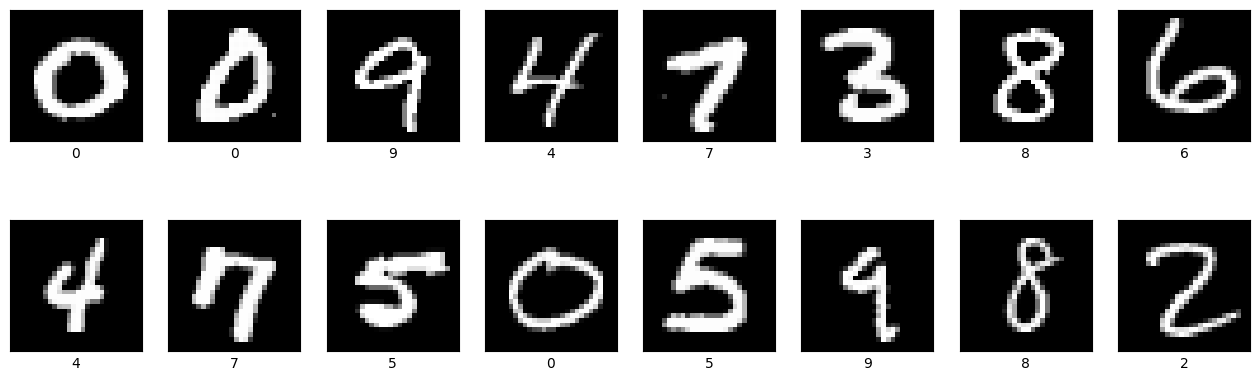

In [ ]:
cols = 8
rows = 2
fig = plt.figure(figsize=(2 * cols, 2.5 * rows))
for i in range(cols):
    for j in range(rows):
        random_index = np.random.randint(0, len(train_set))
        ax = fig.add_subplot(rows, cols, i * rows + j + 1)
        ax.grid(False)
        ax.set_xticks([])
        ax.set_yticks([])
        ax.imshow(train_set[random_index][0].squeeze(0).numpy().reshape([28, 28]), cmap = 'gray')
        ax.set_xlabel(train_set[random_index][1])
plt.show()

Каждая картинка это матрица из чисел. Если число большое - пиксель яркий. Если маленькое - тёмный.

In [ ]:
train_set[5][0].shape

torch.Size([1, 28, 28])

Будем прогнозировать тип картинки по её пикселям. Подготовим данные с помощью `DataLoader`. Пока что попробуем настроить его максимально просто. В будущем мы увидим с вами другую магию, на которую способна эта абстракция. 

### Задание 7:

Напишите `DataLoader` для тренировочной и тестовой выборок. Попробуйте проитерироваться по нескольким его первым объектам с помощью цикла.

В обучающей выборке данные должны перемешиваться каждую эпоху. Размер батча поставьте равным 64. В тестовой выборке данных перемешивать не надо.

In [ ]:
# берем датасет, перемешиваем его и формируем батчи
train_loader = torch.utils.data.DataLoader(
    train_set, batch_size=64, shuffle=True
)

test_loader = torch.utils.data.DataLoader(
    test_set, batch_size=64, shuffle=False
)

In [ ]:
for images, labels in train_loader:
    print(images.shape, labels.shape)
    break

torch.Size([64, 1, 28, 28]) torch.Size([64])


### Задание 8:

Напишите  двухслойную полносвязную нейросеть. Выходной слой должен состоять из $10$ нейронов с `Softmax` в качестве функции активации, так как мы решаем задачу классификации $10$ классов. 

In [ ]:
class MLP(nn.Module):
    def __init__(self, in_features, num_classes, hidden_size):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(in_features=in_features, out_features=hidden_size),
            nn.ReLU(),
            nn.Linear(in_features=hidden_size, out_features=hidden_size, bias=False),
            nn.LeakyReLU(0.1),
            nn.Linear(in_features=hidden_size, out_features=num_classes),
            # nn.LogSoftmax(), # в функцию потерь пойдут логиты
        )

    def forward(self, x):
        return self.model(x)

In [ ]:
model = MLP(28**2, 10, 20)

Веса моделей хранятся в виде матриц и выглядят так:

In [ ]:
# [x for x in model.named_parameters()] 

Объявляем модель и оптимизатор.

In [ ]:
IMG_SIZE = 28
NUM_CLASSES = 10
HIDDEN_SIZE = 64
NUM_EPOCHS = 10

device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
model = MLP(in_features=IMG_SIZE ** 2, num_classes=NUM_CLASSES, hidden_size=HIDDEN_SIZE).to(device)

# оптимайзер
optimizer = torch.optim.SGD(model.parameters(), lr=0.01, momentum=0.9)

# функция потерь 
criterion = nn.CrossEntropyLoss()  # nn.NLLLoss()


Осталось всё это дело обучить. Для этого нам придётся написать цикл

In [ ]:
from tqdm.notebook import tqdm

# NUM_EPOCHS раз подряд пройдемся по всем батчам из трейна
for epoch in range(NUM_EPOCHS):
    
    # берем батч из трейн лоадера
    for images, labels in tqdm(train_loader):
        
        # отправляем тензоры на девайс к сетке
        images = images.to(device)
        labels = labels.to(device)
        
        ### Пишем самые важные 5 строк
        ### Мы их дальше будем встречать везде
        
        # зануляем старые градиенты иначе они сложатся
        optimizer.zero_grad()
        
        # вызываем модель
        logits = model(torch.flatten(images, start_dim=1))
        # (batch_size, x, num_classes) - размерность
        
        # считаем функцию потерь 
        loss = criterion(logits, labels)
        
        # считаем градиенты обратным проходом
        loss.backward() 
        
        # обновляем параметры сети (шаг спуска)
        optimizer.step()
        
    if epoch % 2 == 0:
        mean_val_loss = [] # сюда будем складывать средний лосс по батчам
        val_accuracy = []
        
        # берем батч из вал лоадера для валидации
        for images, labels in tqdm(test_loader, desc='Validating'):
            images = images.to(device)
            labels = labels.to(device)
            
            # мы считаем качество, поэтому мы запрещаем фреймворку считать градиенты по параметрам
            with torch.no_grad(): 
                # делаем предсказания
                logits = model(torch.flatten(images, start_dim=1))
                
                # считаем ошибку на валидации
                loss = criterion(logits, labels)
                
                mean_val_loss.append(loss.numpy()) # добавляем в массив 
                val_accuracy.extend((torch.argmax(logits, dim=-1) == labels).numpy().tolist())
        
        # выводим статистику
        print('Epoch: {epoch}, loss: {loss}, accuracy: {accuracy}'.format(
                epoch=epoch, loss=np.mean(mean_val_loss), accuracy=np.mean(val_accuracy)
        )) 
        

  0%|          | 0/938 [00:00<?, ?it/s]

Validating:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch: 0, loss: 0.254931777715683, accuracy: 0.9243


  0%|          | 0/938 [00:00<?, ?it/s]

  0%|          | 0/938 [00:00<?, ?it/s]

Validating:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch: 2, loss: 0.12739315629005432, accuracy: 0.9614


  0%|          | 0/938 [00:00<?, ?it/s]

  0%|          | 0/938 [00:00<?, ?it/s]

Validating:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch: 4, loss: 0.10643548518419266, accuracy: 0.9685


  0%|          | 0/938 [00:00<?, ?it/s]

  0%|          | 0/938 [00:00<?, ?it/s]

Validating:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch: 6, loss: 0.08490326255559921, accuracy: 0.9739


  0%|          | 0/938 [00:00<?, ?it/s]

  0%|          | 0/938 [00:00<?, ?it/s]

Validating:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch: 8, loss: 0.085875004529953, accuracy: 0.9733


  0%|          | 0/938 [00:00<?, ?it/s]

Кажется, что всё работает. 

### Ещё одно задание:

На следующей паре мы продолжим обучать эту сетку и попробуем улучшить получившийся у нас пайплайн. Попробуйте для удобства вынести один шаг обучения модели и один шаг валидации модели в отдельные небольшие функции, чтобы код стал более читаемым. 

## Почиташки

__Откуда взялась эта тетрадка?__ 

Когда я писал эту тетрадку, я ориентировался на четыре источника:

- [Введение в pytorch от ШАД](https://github.com/yandexdataschool/Practical_DL/blob/fall22/week02_autodiff/seminar_pytorch.ipynb)
- [Тетрадка с введением в pytorch с ИАД](https://github.com/hse-ds/iad-deep-learning/blob/master/2022/seminars/sem01/sem01.ipynb) (её взяли из ШАД)
- [Введение в pytorch от Samsung](https://github.com/SlinkoIgor/Neural_Networks_and_CV)
- [Экспромт Ильдуса с семинаров по DL на ФКН](https://github.com/isadrtdinov/intro-to-dl-hse/tree/2022-2023/seminars/202)

Я добавил к ним свою больную фантазию и получилось то, что получилось.


__Что можно почитать?__

* [Документация торча](https://pytorch.org/docs/master/)
* [Использование pytorch на GPU](https://pytorch.org/docs/master/notes/cuda.html)
* [Хорошая книга про pytorch](http://download.webclark.org/Deep-Learning-with-PyTorch.pdf)
* [Pytorch за 60 минут](http://pytorch.org/tutorials/beginner/deep_learning_60min_blitz.html)
* [Как устроено автоматическое дифференцирование в pytorch](http://videolectures.net/site/normal_dl/tag=1129745/deeplearning2017_johnson_automatic_differentiation_01.pdf)
* [PyTorch examples](https://github.com/pytorch/examples)
* [Practical pytorch tutorials](https://github.com/spro/practical-pytorch)